In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from datetime import datetime
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import gc
import glob

from netCDF4 import Dataset

from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects

In [3]:
xr.open_dataset(output_file)

<xarray.Dataset>
Dimensions:        (time: 289, south_north: 8400, west_east: 3780)
Coordinates:
    XLAT           (south_north, west_east) float32 ...
    XLONG          (south_north, west_east) float32 ...
  * time           (time) datetime64[ns] 2020-03-13 ... 2020-03-14
Dimensions without coordinates: south_north, west_east
Data variables:
    Times          (time, south_north, west_east) |S19 ...
    QHYDROMETEORS  (time, south_north, west_east) float32 ...
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2020-03-12_22:00:00
    WEST-EAST_GRID_DIMENSION:        3781
    SOUTH-NORTH_GRID_DIMENSION:      8401
    BOTTOM-TOP_GRID_DIMENSION:       136
    DX:                              150.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0
    history:                         Sun Feb 26 21:12:44 2023: ncks --cnk_csh...
    NCO:                             netCDF Operators version 5.0.3 (Homepage...

In [11]:
np.max(one['QHYDROMETEORS'][261])

<xarray.DataArray 'QHYDROMETEORS' ()>
array(0.00060778)
Coordinates:
    time     datetime64[ns] 2020-03-13T21:45:00

In [ ]:
two = xr.open_dataset('/glade/scratch/noteng/q-hydromet.nc')
two

In [11]:
v['QHYDROMETEORS'][261][0]

<xarray.DataArray 'QHYDROMETEORS' (south_north: 8400, west_east: 3780)>
[31752000 values with dtype=float32]
Coordinates:
    XLAT     (south_north, west_east) float32 ...
    XLONG    (south_north, west_east) float32 ...
    time     datetime64[ns] 2020-03-13T21:45:00
Dimensions without coordinates: south_north, west_east

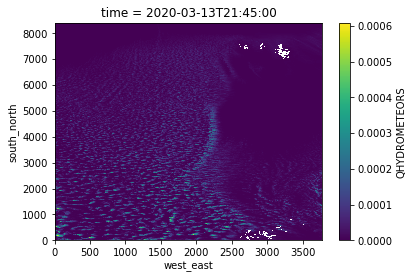

In [8]:
v['QHYDROMETEORS'][261][0].plot()

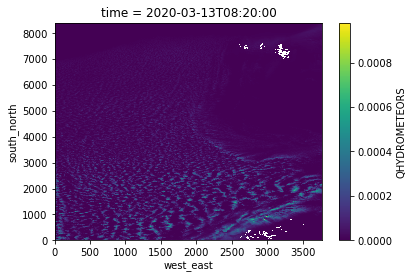

In [9]:
v['QHYDROMETEORS'][100][0].plot()

In [3]:
np.min(v['QHYDROMETEORS'][0][0]['XLONG'].values), np.max(v['QHYDROMETEORS'][0][0]['XLONG'].values)

(-7.4482, 24.003365)

In [4]:
np.min(v['QHYDROMETEORS'][0][0]['XLAT'].values), np.max(v['QHYDROMETEORS'][0][0]['XLAT'].values)

(68.22537, 80.68309)

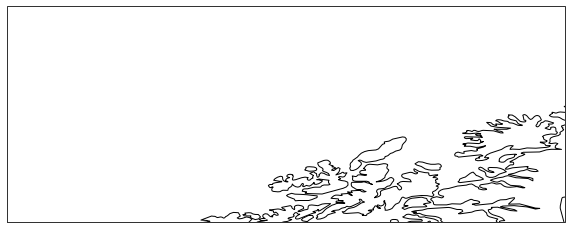

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 9), subplot_kw={
                           'projection': ccrs.PlateCarree()})

# # Add map features: coastline, ocean, land, and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)


extent = ([11, 18.2, 68.22, 71])  # define extent map
ax.set_extent(extent)  # set extent of map

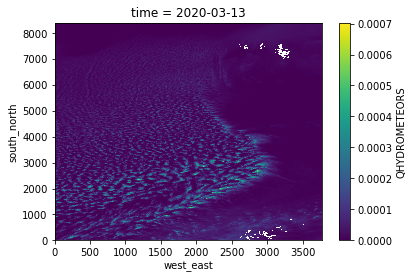

In [6]:
v['QHYDROMETEORS'][0][0].plot()

In [ ]:
### center points and extent of map ###
latA = 69.141281  # latitude of COMBLE site
lonA = 15.684166-1  # longitude of COMBLE site -1
xm, ym = 6, 2.75  # extent from center point in lon and lat

fig, ax = plt.subplots(1, 1, figsize=(10, 9), subplot_kw={
                           'projection': ccrs.PlateCarree()})


extent = ([10, 18.2, 68.22, 71])  # define extent map
ax.set_extent(extent)  # set extent of map

# Add map features: coastline, ocean, land, and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN, alpha=0.2)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)
# ax.plot(v['QHYDROMETEORS'][0][0]['XLONG'], v['QHYDROMETEORS'][0][0]['XLAT'], v['QHYDROMETEORS'][0][0]);

v['QHYDROMETEORS'][0][0].plot()

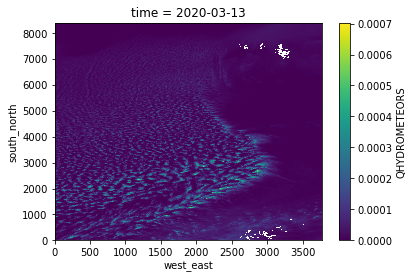

In [31]:
v['QHYDROMETEORS'][0][0].plot() # March 13 00:00

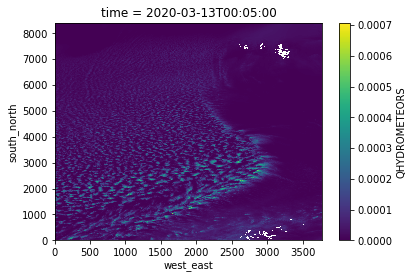

In [14]:
v['QHYDROMETEORS'][1].plot() # March 13 00:05

In [ ]:
fig, ax = plt.subpl

In [10]:
v['QHYDROMETEORS']['XLAT'].values

array([[[68.22537 , 68.22577 , 68.226166, ..., 69.10871 , 69.10878 ,
         69.10885 ],
        [68.22669 , 68.22709 , 68.227486, ..., 69.11009 , 69.11016 ,
         69.11023 ],
        [68.22802 , 68.22841 , 68.228806, ..., 69.111465, 69.11154 ,
         69.1116  ],
        ...,
        [78.87237 , 78.87312 , 78.87387 , ..., 80.680046, 80.6802  ,
         80.68036 ],
        [78.87352 , 78.87427 , 78.87502 , ..., 80.68141 , 80.681564,
         80.681725],
        [78.87469 , 78.87543 , 78.87619 , ..., 80.68278 , 80.682945,
         80.68309 ]]], dtype=float32)

In [11]:
v['QHYDROMETEORS']['XLONG'].values

array([[[ 9.856493 ,  9.860056 ,  9.863617 , ..., 23.995634 ,
         23.999498 , 24.003365 ],
        [ 9.855439 ,  9.859001 ,  9.862562 , ..., 23.99544  ,
         23.999306 , 24.00317  ],
        [ 9.854383 ,  9.857946 ,  9.861507 , ..., 23.995243 ,
         23.999111 , 24.002975 ],
        ...,
        [-7.440375 , -7.434393 , -7.4284105, ..., 20.39721  ,
         20.405645 , 20.41408  ],
        [-7.4442873, -7.438305 , -7.432322 , ..., 20.396273 ,
         20.404709 , 20.413147 ],
        [-7.4482   , -7.442217 , -7.4362335, ..., 20.395336 ,
         20.403774 , 20.412209 ]]], dtype=float32)

In [ ]:
# %%time
# print("Importing Libraries...")

# #======================
# print("finished importing Libraries")

# print("starting reading data")
# path_to_variables = sorted(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_cloud_d02_2020-03-*"))
# path_to_lat_lon = '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_wind_d02_2020-03-13_00_00_00'
# print("done reading data")
# #=================

# print("Getting the height from the wind path")
# # Assuming you've already opened the dataset and have the 'HGT' variable in meters
# wind_vars = xr.open_dataset(path_to_lat_lon)
# height_meters = wind_vars['HGT']  # 'HGT' is in meters

# # Convert height to kilometers
# height_kilometers = height_meters / 1000
# print("Done converting...")

# # Initialize an empty list to store modified datasets
# print("Loading function and performing computations")
# datasets_list = []

# for i, path in enumerate(path_to_variables[:2]):
#     # List of variables you want to keep
#     variables_to_keep = ['QRAIN', 'QGRAUP', 'QSNOW', 'Times']
    
#     # Open the dataset
#     ds = xr.open_dataset(path)
    
#     # Remove all variables except the ones in variables_to_keep
#     ds = ds.drop_vars([var for var in ds.data_vars if var not in variables_to_keep])
    
#     # Add the height_below_1km variable to the dataset
#     ds['HGT'] = height_kilometers  # Assuming the dimensions match
    
#     # Filter the height variable to include values less than or equal to 1 km 
#     ds = ds.where(ds['HGT']<=1, drop=True)
#     print(ds)
    
#     # Append the modified dataset to the list
#     # datasets_list.append(ds)

Importing Libraries...
finished importing Libraries
starting reading data
done reading data
Getting the height from the wind path
Done converting...
Loading function and performing computations
<xarray.Dataset>
Dimensions:  (Time: 1, bottom_top: 135, south_north: 8400, west_east: 3780)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 68.23 68.23 ... 80.68 80.68
    XLONG    (Time, south_north, west_east) float32 9.856 9.86 ... 20.4 20.41
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Data variables:
    QGRAUP   (Time, bottom_top, south_north, west_east) float32 1.866e-09 ......
    QRAIN    (Time, bottom_top, south_north, west_east) float32 0.0 0.0 ... 0.0
    QSNOW    (Time, bottom_top, south_north, west_east) float32 0.0001922 ......
    Times    (Time, south_north, west_east) object b'2020-03-13_00:00:00' ......
    HGT      (Time, south_north, west_east) float32 0.0 0.0 ... 0.0002893
Attributes: (12/88)
    TITLE:                          

In [ ]:
import glob
import os
import xarray as xr

# Print import messages
print("Importing Libraries...")

#======================
print("finished importing Libraries")

# Print a message indicating the start of data reading
print("starting reading data")

# Specify the path to the variables
path_to_variables = sorted(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_cloud_d02_2020-03-*"))

# Specify the path to the latitude and longitude data
path_to_lat_lon = '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_wind_d02_2020-03-13_00_00_00'

# Print a message indicating the end of data reading
print("done reading data")
#=================

# Print a message indicating the retrieval of height data
print("Getting the height from the wind path")

# Assuming you've already opened the dataset and have the 'HGT' variable in meters
wind_vars = xr.open_dataset(path_to_lat_lon)
height_meters = wind_vars['HGT']  # 'HGT' is in meters

# Convert height to kilometers
height_kilometers = height_meters / 1000

# Print a message indicating the completion of height conversion
print("Done converting...")

# Initialize an empty list to store modified datasets
print("Loading function and performing computations")
datasets_list = []

# Define the output directory
output_dir = "/glade/scratch/noteng/LES-output/"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

for i, path in enumerate(path_to_variables[:3]):
    # List of variables you want to keep
    variables_to_keep = ['QRAIN', 'QGRAUP', 'QSNOW', 'Times']
    
    # Extract the original file name from the path
    original_filename = os.path.basename(path)
    
    # Define the output file path including the output directory
    output_file = os.path.join(output_dir, original_filename)
    
    # Check if the output file already exists
    if os.path.exists(output_file):
        # Check if the file was successfully executed by checking its size
        if os.path.getsize(output_file) > 0:
            print(f"File '{output_file}' already exists and was successfully executed. Skipping...")
            continue  # Move to the next file
    
    # Open the dataset and perform computations
    try:
        # Open the dataset
        ds = xr.open_dataset(path)
        
        # Remove all variables except the ones in variables_to_keep
        ds = ds.drop_vars([var for var in ds.data_vars if var not in variables_to_keep])
        
        # Add the height_below_1km variable to the dataset
        ds['HGT'] = height_kilometers  # Assuming the dimensions match
        
        # Filter the height variable to include values less than or equal to 1 km 
        ds = ds.where(ds['HGT'] <= 1, drop=True)
        
        # Save the modified dataset to the output file
        ds.to_netcdf(output_file)
        
        # Append the output file name to the list (if needed)
        datasets_list.append(output_file)
        
        print(f"File '{output_file}' processed and saved.")
    
    except Exception as e:
        print(f"Error processing file '{output_file}': {str(e)}")
        print(f"Retrying file '{output_file}'...")
        continue  # Retry the same file

# Print the list of saved output file names
print(f"Datasets saved to the '{output_dir}' directory.")


In [4]:
%%timeit
path_to_variables = np.sort(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_cloud_d02_2020-03-*"))
path_to_variables

The slowest run took 4.02 times longer than the fastest. This could mean that an intermediate result is being cached.
140 ms ± 47.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
%%time
path_to_variables = np.sort(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_cloud_d02_2020-03-*"))
path_to_variables

CPU times: user 4.37 ms, sys: 5.38 ms, total: 9.75 ms
Wall time: 107 ms


array(['/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_cloud_d02_2020-03-13_00_00_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_cloud_d02_2020-03-13_00_05_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d02_2020-03-13_00_10_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d02_2020-03-13_00_15_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d02_2020-03-13_00_20_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d02_2020-03-13_00_25_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d02_2020-03-13_00_30_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_03/compressed/wrfout_

In [6]:
%%timeit
path_to_variabless = sorted(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_cloud_d02_2020-03-*"))
path_to_variabless

105 ms ± 37.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%%time
path_to_variabless = sorted(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_cloud_d02_2020-03-*"))
path_to_variabless

CPU times: user 5.82 ms, sys: 3.83 ms, total: 9.65 ms
Wall time: 149 ms


['/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_cloud_d02_2020-03-13_00_00_00',
 '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_cloud_d02_2020-03-13_00_05_00',
 '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d02_2020-03-13_00_10_00',
 '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d02_2020-03-13_00_15_00',
 '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d02_2020-03-13_00_20_00',
 '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d02_2020-03-13_00_25_00',
 '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d02_2020-03-13_00_30_00',
 '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_03/compressed/wrfout_cloud_d02_2020-03-13_00_35_00',
 '/glade/campaig

In [2]:
c =xr.open_dataset('/glade/derecho/scratch/noteng/merged_data.nc')

In [4]:
c['Times']

<xarray.DataArray 'Times' (Time: 2, south_north: 8400, west_east: 3780)>
[63504000 values with dtype=|S19]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east

In [2]:
# %%time
# path_to_variables = np.sort(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_cloud_d02_2020-03-*"))
# path_to_lat_lon = np.sort(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_wind_d02_2020-03-*"))

In [3]:
# xr.open_dataset(path_to_variables[0])['Times']

In [3]:
# # Assuming you've already opened the dataset and have the 'HGT' variable in meters
# wind_vars = xr.open_dataset(path_to_lat_lon[0])
# height_meters = wind_vars['HGT']  # Assuming 'HGT' is in meters

# # Convert height to kilometers
# height_kilometers = height_meters / 1000

# # Filter the height variable to include values less than or equal to 1 km
# # height_below_1km = height_kilometers.where(height_kilometers <= 1.00001, drop=True)

In [4]:
# height_below_1km.max()

In [ ]:
%%time
path_to_variables = np.sort(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_cloud_d02_2020-03-*"))
path_to_lat_lon = np.sort(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_wind_d02_2020-03-*"))


# Assuming you've already opened the dataset and have the 'HGT' variable in meters
wind_vars = xr.open_dataset(path_to_lat_lon[0])
height_meters = wind_vars['HGT']  # Assuming 'HGT' is in meters

# Convert height to kilometers
height_kilometers = height_meters / 1000

# Filter the height variable to include values less than or equal to 1 km
# height_below_1km = height_kilometers.where(height_kilometers <= 1, drop=True)

# Initialize an empty list to store modified datasets
datasets_list = []

for i, path in enumerate(path_to_variables[:2]):
    # List of variables you want to keep
    variables_to_keep = ['QRAIN', 'QGRAUP', 'QSNOW', 'Times']
    
    # Open the dataset
    ds = xr.open_dataset(path)
    
    # Remove all variables except the ones in variables_to_keep
    ds = ds.drop_vars([var for var in ds.data_vars if var not in variables_to_keep])
    
    # Add the height_below_1km variable to the dataset
    ds['HGT'] = height_kilometers  # Assuming the dimensions match
    
    # Filter the height variable to include values less than or equal to 1 km 
    ds = ds.where(ds['HGT']<=1, drop=True)
    
    # Append the modified dataset to the list
    datasets_list.append(ds)

# Combine the datasets in the list into a single dataset along the 'Time' dimension
combined_dataset = xr.concat(datasets_list, dim='Time')

# Now, combined_dataset contains the selected variables and the height_below_1km variable


In [3]:
path_to_variables = np.sort(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_cloud_d02_2020-03-*"))
path_to_lat_lon = np.sort(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_wind_d02_2020-03-*"))


# Assuming you've already opened the dataset and have the 'HGT' variable in meters
wind_vars = xr.open_dataset(path_to_lat_lon[0])
height_meters = wind_vars['HGT']  # Assuming 'HGT' is in meters

# Convert height to kilometers
height_kilometers = height_meters / 1000

# Filter the height variable to include values less than or equal to 1 km
# height_below_1km = height_kilometers.where(height_kilometers <= 1.00001, drop=True)


# List of variables you want to keep
variables_to_keep = ['QRAIN', 'QGRAUP', 'QSNOW', 'Times']

# Open the dataset
ds = xr.open_dataset(path_to_variables[0])

# Remove all variables except the ones in variables_to_keep
ds = ds.drop_vars([var for var in ds.data_vars if var not in variables_to_keep])

# Add the height_below_1km variable to the dataset
ds['HGT'] = height_kilometers  # Assuming the dimensions match

ds = ds.where(ds['HGT']<=1, drop=True)

In [4]:
ds

<xarray.Dataset>
Dimensions:  (Time: 1, bottom_top: 135, south_north: 8400, west_east: 3780)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 68.23 68.23 ... 80.68 80.68
    XLONG    (Time, south_north, west_east) float32 9.856 9.86 ... 20.4 20.41
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Data variables:
    QGRAUP   (Time, bottom_top, south_north, west_east) float32 1.866e-09 ......
    QRAIN    (Time, bottom_top, south_north, west_east) float32 0.0 0.0 ... 0.0
    QSNOW    (Time, bottom_top, south_north, west_east) float32 0.0001922 ......
    Times    (Time, south_north, west_east) object b'2020-03-13_00:00:00' ......
    HGT      (Time, south_north, west_east) float32 0.0 0.0 ... 0.0002893
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2020-03-12_22:00:00
    WEST-EAST_GRID_DIMENSION:        3781
    SOUTH-NORTH_GRID_DIMENSION:      8401
    BOTTOM-TOP_GRID_DIMENSION:       136
    DX:                              150.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0
    history:                         Sun Feb 26 21:12:44 2023: ncks --cnk_csh...
    NCO:                             netCDF Operators version 5.0.3 (Homepage...

<xarray.DataArray 'HGT' ()>
array(0.9999997)

In [6]:
res = ds.where(ds['HGT']<=1, drop=True)
res

<xarray.Dataset>
Dimensions:  (Time: 1, bottom_top: 135, south_north: 8400, west_east: 3780)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 68.23 68.23 ... 80.68 80.68
    XLONG    (Time, south_north, west_east) float32 9.856 9.86 ... 20.4 20.41
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Data variables:
    QGRAUP   (Time, bottom_top, south_north, west_east) float32 1.866e-09 ......
    QRAIN    (Time, bottom_top, south_north, west_east) float32 0.0 0.0 ... 0.0
    QSNOW    (Time, bottom_top, south_north, west_east) float32 0.0001922 ......
    Times    (Time, south_north, west_east) object b'2020-03-13_00:00:00' ......
    HGT      (Time, south_north, west_east) float32 0.0 0.0 ... 0.0002893
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2020-03-12_22:00:00
    WEST-EAST_GRID_DIMENSION:        3781
    SOUTH-NORTH_GRID_DIMENSION:      8401
    BOTTOM-TOP_GRID_DIMENSION:       136
    DX:                              150.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0
    history:                         Sun Feb 26 21:12:44 2023: ncks --cnk_csh...
    NCO:                             netCDF Operators version 5.0.3 (Homepage...

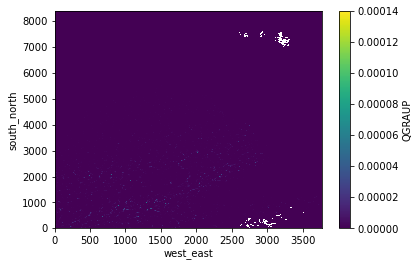

In [11]:
res['QGRAUP'].mean('bottom_top')

In [7]:
ds['HGT']<=1

<xarray.DataArray 'HGT' (Time: 1, south_north: 8400, west_east: 3780)>
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east

In [ ]:
ds[ds['Q']]

In [ ]:
ds['QGRAUP'].values

In [ ]:
ds.to_netcdf("final.nc")

In [20]:
# Open the dataset
ds = xr.open_dataset(path_to_lat_lon[0])  # Replace with your dataset path

# # Access the height values associated with each index in the bottom_top dimension
heights_meters = ds['HGT'].values  # Assuming 'HGT' contains the height data in meters


# # Target height in meters (1 km)
target_height_meters = 1000

# # Calculate the absolute differences between the target height and all height values
height_differences = np.abs(heights_meters - target_height_meters)


# # Find the index that corresponds to the minimum height difference
index_for_1km_height = np.argmin(height_differences)
# index_for_1km_height

#The 'index_for_1km_height' variable now contains the index corresponding to 1 km MSL.
print("Index for 1 km MSL:", index_for_1km_height)


Index for 1 km MSL: 694859


In [5]:
# for i, v in enumerate(path_to_variables[:3]):
#     # List of variables you want to keep
#     variables_to_keep = ['QRAIN', 'QGRAUP', 'QSNOW']
    
#     ds = xr.open_dataset(v)
#     # Remove all variables except the ones in variables_to_keep
#     ds = ds.drop_vars([var for var in ds.data_vars if var not in variables_to_keep])
    
#     # Assign XLAT and XLONG as coordinates to the 'res' dataset
#     ds = ds.assign_coords({'latitude': wind['XLAT'], 'longitude': wind['XLONG']})
#     print(ds)

In [5]:
# path_to_variables = np.sort(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_cloud_d02_2020-03-*"))
# path_to_lat_lon = np.sort(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_wind_d02_2020-03-*"))

# Initialize an empty list to store modified datasets
datasets_list = []

for i, v in enumerate(path_to_variables[:3]):
    # List of variables you want to keep
    variables_to_keep = ['QRAIN', 'QGRAUP', 'QSNOW']
    
    # Open the dataset
    ds = xr.open_dataset(v)
    
    # Remove all variables except the ones in variables_to_keep
    ds = ds.drop_vars([var for var in ds.data_vars if var not in variables_to_keep])
    
#     # Assign XLAT and XLONG as coordinates to the 'res' dataset
#     ds = ds.assign_coords({'latitude': wind['XLAT'], 'longitude': wind['XLONG']})
 
    
    # Assuming 'Time' is a common dimension in all datasets
    # datasets_list.append(ds)


<xarray.Dataset>
Dimensions:    (Time: 1, bottom_top: 135, south_north: 8400, west_east: 3780)
Coordinates:
    XLAT       (Time, south_north, west_east) float32 68.23 68.23 ... 80.68
    XLONG      (Time, south_north, west_east) float32 9.856 9.86 ... 20.4 20.41
    latitude   (Time, south_north, west_east) float32 ...
    longitude  (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Data variables:
    QGRAUP     (Time, bottom_top, south_north, west_east) float32 ...
    QRAIN      (Time, bottom_top, south_north, west_east) float32 ...
    QSNOW      (Time, bottom_top, south_north, west_east) float32 ...
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2020-03-12_22:00:00
    WEST-EAST_GRID_DIMENSION:        3781
    SOUTH-NORTH_GRID_DIMENSION:      8401
    BOTTOM-TOP_GRID_DIMENSION:       136
    DX:                              150.0
    ...    

In [ ]:
# Use xr.concat() to merge datasets along the 'Time' dimension
merged_dataset = xr.concat(datasets_list, dim='Time')

# Now, merged_dataset contains the filtered and merged data along the 'Time' dimension


In [ ]:
xr.open

In [4]:
# %%time
res = xr.open_mfdataset(path)
res


# Assign XLAT and XLONG as coordinates to the 'res' dataset
# res = res.assign_coords({'latitude': wind['XLAT'], 'longitude': wind['XLONG']})

# Now, the 'res' dataset will have 'latitude' and 'longitude' as coordinates


<xarray.Dataset>
Dimensions:     (Time: 1, bottom_top: 135, south_north: 8400, west_east: 3780)
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Data variables: (12/26)
    QCLOUD      (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    QGRAUP      (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    QICE        (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    QNCLOUD     (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    QNICE       (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    QNIFA       (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    ...          ...
    TAU_QC      (Time, south_north, west_east) float32 dask.array<chunksize=(1, 8400, 3780), meta=np.ndarray>
    TAU_QC_TOT  (Time, south_north, west_east) float32 dask.array<chunksize=(1, 8400, 3780), meta=np.ndarray>
    TAU_QI      (Time, south_north, west_east) float32 dask.array<chunksize=(1, 8400, 3780), meta=np.ndarray>
    TAU_QI_TOT  (Time, south_north, west_east) float32 dask.array<chunksize=(1, 8400, 3780), meta=np.ndarray>
    TAU_QS      (Time, south_north, west_east) float32 dask.array<chunksize=(1, 8400, 3780), meta=np.ndarray>
    Times       (Time) |S19 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2020-03-13_00:05:00
    WEST-EAST_GRID_DIMENSION:        3781
    SOUTH-NORTH_GRID_DIMENSION:      8401
    BOTTOM-TOP_GRID_DIMENSION:       136
    DX:                              150.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0
    history:                         Sun Feb 26 12:22:15 2023: ncks --cnk_csh...
    NCO:                             netCDF Operators version 5.0.3 (Homepage...

In [8]:
res

<xarray.Dataset>
Dimensions:     (Time: 1, bottom_top: 135, south_north: 8400, west_east: 3780)
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Data variables: (12/26)
    QCLOUD      (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    QGRAUP      (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    QICE        (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    QNCLOUD     (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    QNICE       (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    QNIFA       (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    ...          ...
    TAU_QC      (Time, south_north, west_east) float32 dask.array<chunksize=(1, 8400, 3780), meta=np.ndarray>
    TAU_QC_TOT  (Time, south_north, west_east) float32 dask.array<chunksize=(1, 8400, 3780), meta=np.ndarray>
    TAU_QI      (Time, south_north, west_east) float32 dask.array<chunksize=(1, 8400, 3780), meta=np.ndarray>
    TAU_QI_TOT  (Time, south_north, west_east) float32 dask.array<chunksize=(1, 8400, 3780), meta=np.ndarray>
    TAU_QS      (Time, south_north, west_east) float32 dask.array<chunksize=(1, 8400, 3780), meta=np.ndarray>
    Times       (Time) |S19 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2020-03-13_00:05:00
    WEST-EAST_GRID_DIMENSION:        3781
    SOUTH-NORTH_GRID_DIMENSION:      8401
    BOTTOM-TOP_GRID_DIMENSION:       136
    DX:                              150.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0
    history:                         Sun Feb 26 12:22:15 2023: ncks --cnk_csh...
    NCO:                             netCDF Operators version 5.0.3 (Homepage...

In [5]:
# Open your dataset (assuming it's named 'ds')
# ds = ...

# List of variables you want to keep
variables_to_keep = ['QRAIN', 'QGRAUP']

# Remove all variables except the ones in variables_to_keep
ds = res.drop_vars([var for var in res.data_vars if var not in variables_to_keep])
ds

<xarray.Dataset>
Dimensions:  (Time: 1, bottom_top: 135, south_north: 8400, west_east: 3780)
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Data variables:
    QGRAUP   (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
    QRAIN    (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 135, 8400, 3780), meta=np.ndarray>
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2020-03-13_00:05:00
    WEST-EAST_GRID_DIMENSION:        3781
    SOUTH-NORTH_GRID_DIMENSION:      8401
    BOTTOM-TOP_GRID_DIMENSION:       136
    DX:                              150.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0
    history:                         Sun Feb 26 12:22:15 2023: ncks --cnk_csh...
    NCO:                             netCDF Operators version 5.0.3 (Homepage...

In [ ]:
import xarray as xr
import numpy as np
import glob

# Load the res dataset from multiple files
path1 = np.sort(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_cloud_d02_2020-03-*"))
datasets = [xr.open_dataset(file) for file in path1]

# Concatenate the datasets along the 'Time' dimension
res = xr.concat(datasets, dim='Time')

# Load the wind dataset with XLAT and XLONG coordinates
wi = "/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_wind_d02_2020-03-13_00_00_00"
wind = xr.open_dataset(wi)

# Assign XLAT and XLONG as coordinates to the 'res' dataset
res = res.assign_coords({'latitude': wind['XLAT'], 'longitude': wind['XLONG']})

# Now, the 'res' dataset will have 'XLAT' and 'XLONG' as coordinates


In [25]:
%%time

# Open the multi-file dataset
res = xr.open_mfdataset(path1)

# Assign XLAT and XLONG as coordinates
res = res.assign_coords({'latitude': wind['XLAT'].values, 
                         'longitude': wind['XLONG'].values})
res

ValueError: Could not find any dimension coordinates to use to order the datasets for concatenation

In [ ]:
# for i in $(seq 1 1 57); do cp -r "/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_${i}/compressed/wrfout_cloud_d02_*" ./
# for i in $(seq 1 1 57); do cp -r "/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_${printf "%02d" $i}/compressed/wrfout_cloud_d02_*" ./; done

In [10]:
cloud = '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_cloud_d02_2020-03-13_00_00_00'
radar = '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_rad_d02_2020-03-13_00_00_00'
wind = '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_wind_d02_2020-03-13_00_00_00'
turb = '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_turb_d02_2020-03-13_00_00_00'

In [23]:
cloud_variables = xr.open_dataset(cloud, engine='netcdf4')
wind_variables = xr.open_dataset(wind, engine='netcdf4')

In [24]:
q_graupel = cloud_variables['QGRAUP']
q_snow = cloud_variables['QSNOW']
q_rain = cloud_variables['QRAIN']
latitude = wind_variables['XLAT']
longitude = wind_variables['XLONG']

In [25]:
wind_variables

<xarray.Dataset>
Dimensions:      (Time: 1, bottom_top: 135, south_north: 8400, west_east: 3780,
                  bottom_top_stag: 136, west_east_stag: 3781,
                  south_north_stag: 8401)
Coordinates:
    XLAT         (Time, south_north, west_east) float32 ...
    XLONG        (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, bottom_top, south_north, west_east,
                                bottom_top_stag, west_east_stag,
                                south_north_stag
Data variables: (12/30)
    ALT          (Time, bottom_top, south_north, west_east) float32 ...
    CBASEHT      (Time, south_north, west_east) float32 ...
    CBASEHT_TOT  (Time, south_north, west_east) float32 ...
    CTOPHT       (Time, south_north, west_east) float32 ...
    CTOPHT_TOT   (Time, south_north, west_east) float32 ...
    HFX          (Time, south_north, west_east) float32 ...
    ...           ...
    U            (Time, bottom_top, south_north, west_east_stag) float32 ...
    U10          (Time, south_north, west_east) float32 ...
    UST          (Time, south_north, west_east) float32 ...
    V            (Time, bottom_top, south_north_stag, west_east) float32 ...
    V10          (Time, south_north, west_east) float32 ...
    W            (Time, bottom_top_stag, south_north, west_east) float32 ...
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2020-03-12_22:00:00
    WEST-EAST_GRID_DIMENSION:        3781
    SOUTH-NORTH_GRID_DIMENSION:      8401
    BOTTOM-TOP_GRID_DIMENSION:       136
    DX:                              150.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0
    history:                         Sun Feb 26 21:38:34 2023: ncks --cnk_csh...
    NCO:                             netCDF Operators version 5.0.3 (Homepage...

In [5]:
xr.open_dataset('./out.nc')

<xarray.Dataset>
Dimensions:     (Time: 1, bottom_top: 135, south_north: 8400, west_east: 3780)
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Data variables: (12/26)
    QCLOUD      (Time, bottom_top, south_north, west_east) float32 ...
    QGRAUP      (Time, bottom_top, south_north, west_east) float32 ...
    QICE        (Time, bottom_top, south_north, west_east) float32 ...
    QNCLOUD     (Time, bottom_top, south_north, west_east) float32 ...
    QNICE       (Time, bottom_top, south_north, west_east) float32 ...
    QNIFA       (Time, bottom_top, south_north, west_east) float32 ...
    ...          ...
    TAU_QC      (Time, south_north, west_east) float32 ...
    TAU_QC_TOT  (Time, south_north, west_east) float32 ...
    TAU_QI      (Time, south_north, west_east) float32 ...
    TAU_QI_TOT  (Time, south_north, west_east) float32 ...
    TAU_QS      (Time, south_north, west_east) float32 ...
    Times       (Time) |S19 ...
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2020-03-12_22:00:00
    WEST-EAST_GRID_DIMENSION:        3781
    SOUTH-NORTH_GRID_DIMENSION:      8401
    BOTTOM-TOP_GRID_DIMENSION:       136
    DX:                              150.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0
    history:                         Sun Feb 26 21:12:44 2023: ncks --cnk_csh...
    NCO:                             netCDF Operators version 5.0.3 (Homepage...

In [ ]:
c

In [8]:
def data_reader(variable:str):
    """
    This function is a data reader function that read data of 
    LES model using the specific variables: cloud, rad, turb and wind.
    
    variable: str
            "enter either rad or wind in strings as variable"
            E.g. data_reader("wind") or data_reader("rad")
    """
    
    path = f'/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed'
    data = f'wrfout_cloud_d03_2020-03-1[3-4]*'
    results = np.sort(glob.glob(f'{path}/{data}'))

    return results

In [9]:
clouds = data_reader(variable='cloud')
winds = data_reader(variable='wind')

In [10]:
clouds[:10]

array(['/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_cloud_d03_2020-03-13_00_00_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_cloud_d03_2020-03-13_00_05_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_10_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_15_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_20_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_25_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_30_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_03/compressed/wrfout_

In [12]:
def combining_dataarray(data, var):
    # appending the radar dataset into one dataset
    dataset = []
    for index, ncfile in enumerate(data):
        ds = xr.open_dataset(ncfile, engine='netcdf4')
        
        ds_var = ds[var].load()
        dataset.append(ds_var)

    # Concat dataset over time
    dd = xr.concat(dataset, dim='Time')
    return dd

In [ ]:
%%time
print("QGRAUPEL starting ...")
q_graupels = combining_dataarray(clouds, 'QGRAUP')
print("QGRAUPEL done ...")
print("===================")

print("QSNOW starting ...")
q_snowss = combining_dataarray(clouds, 'QSNOW')
print("QSNOW done ...")
print("===================")

print("QRAIN starting ...")
q_rainss = combining_dataarray(clouds, 'QRAIN')
print("QRAIN done ...")
print("===================")

print("LAT starting ...")
lat = combining_dataarray(winds, 'XLAT')
print("LAT done ...")
print("===================")

print("LON starting ...")
lon = combining_dataarray(winds, 'XLONG')
print("LON done ...")
print("===================")

QGRAUPEL starting ...


In [25]:
path = f'/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed'
data = f'wrfout_cloud_d03_2020-03-1[3-4]*'


# path = f'/glade/campaign/uwyo/wyom0122/lam/new_runs/{run_numbers}/RESTART_*'
# data = f'wrfout_{variable}_d02_2020-03-1[3-4]*'
res = np.sort(glob.glob(f'{path}/{data}'))
res

array(['/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_cloud_d03_2020-03-13_00_00_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_cloud_d03_2020-03-13_00_05_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_10_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_15_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_20_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_25_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_30_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_03/compressed/wrfout_

In [16]:
path = f'/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed'
data = f'wrfout_cloud_d03_2020-03-1[3-4]*'


# path = f'/glade/campaign/uwyo/wyom0122/lam/new_runs/{run_numbers}/RESTART_*'
# data = f'wrfout_{variable}_d02_2020-03-1[3-4]*'
res = np.sort(glob.glob(f'{path}/{data}'))
res

array(['/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_cloud_d03_2020-03-13_00_00_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_cloud_d03_2020-03-13_00_05_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_10_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_15_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_20_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_25_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_02/compressed/wrfout_cloud_d03_2020-03-13_00_30_00',
       '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_03/compressed/wrfout_

In [1]:
import pandas as pd

In [2]:
path = '/glade/work/noteng/masters-research/tobac/march13-to-march14/saved-files/threshold-10/all-cells-first_landfall-threshold-10.csv'


In [3]:
# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Read the CSV file in chunks and concatenate them into the combined_df
for chunk in pd.read_csv(path, chunksize=100):
    combined_df = pd.concat([combined_df, chunk])


In [8]:
combined_df.head(50)

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,...,latitude,longitude,cell,time_cell,distance,mean dBZ,max dBZ,area($km^2$),landfall,relative_time
0,0,67,326.578302,280.675950,5,10,67,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.386578e+06,...,68.422543,14.734897,67,0 days 00:00:00,104.413246,13.245867,34.567482,12.937082,True,0
1,0,68,336.121109,286.415064,196,10,68,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.396121e+06,...,68.331369,14.852404,68,0 days 00:00:00,111.375543,13.245867,34.567482,187.081946,True,0
2,0,78,359.923018,241.782637,166,10,78,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.419923e+06,...,68.145247,13.754067,78,0 days 00:00:00,152.158361,13.245867,34.567482,110.458189,False,5
3,1,87,360.498890,242.770250,205,10,188,2020-03-13 04:05:00,2020-03-13 04:05:00,-2.420499e+06,...,68.139408,13.776453,78,0 days 00:05:00,152.149544,12.974534,35.577388,310.485962,True,0
4,1,14,236.134718,351.719741,3946,10,115,2020-03-13 04:05:00,2020-03-13 04:05:00,-2.296135e+06,...,69.179040,16.675038,110,0 days 00:00:00,27.439561,12.974534,35.577388,3872.517749,False,30
5,2,17,239.021778,352.449592,3931,10,224,2020-03-13 04:10:00,2020-03-13 04:10:00,-2.299022e+06,...,69.152135,16.684675,110,0 days 00:05:00,28.716000,12.780750,34.063904,4052.603886,False,25
6,3,14,243.275698,351.700271,4130,10,325,2020-03-13 04:15:00,2020-03-13 04:15:00,-2.303276e+06,...,69.114412,16.654051,110,0 days 00:10:00,29.374513,12.708913,36.584485,4090.443079,False,20
7,4,18,245.169450,352.684642,4167,10,429,2020-03-13 04:20:00,2020-03-13 04:20:00,-2.305169e+06,...,69.096227,16.672771,110,0 days 00:15:00,31.038656,12.845599,38.092506,4350.141498,False,15
8,5,15,246.547635,354.503289,4330,10,534,2020-03-13 04:25:00,2020-03-13 04:25:00,-2.306548e+06,...,69.081816,16.713383,110,0 days 00:20:00,33.258126,13.138674,36.584485,4299.429052,False,10
9,6,19,247.997064,356.717471,4402,10,644,2020-03-13 04:30:00,2020-03-13 04:30:00,-2.307997e+06,...,69.066325,16.763416,110,0 days 00:25:00,35.865009,13.454442,38.092506,4513.352322,False,5


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from datetime import datetime
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import gc
import glob

from netCDF4 import Dataset

from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects

In [7]:
# combined_df
d = pd.read_csv(path, chunksize=15)
d

In [8]:
for i in d:
    print(i)

    frame  idx      hdim_1      hdim_2   num  threshold_value  feature  \
0       0   67  326.578302  280.675950     5               10       67   
1       0   68  336.121109  286.415064   196               10       68   
2       0   78  359.923018  241.782637   166               10       78   
3       1   87  360.498890  242.770250   205               10      188   
4       1   14  236.134718  351.719741  3946               10      115   
5       2   17  239.021778  352.449592  3931               10      224   
6       3   14  243.275698  351.700271  4130               10      325   
7       4   18  245.169450  352.684642  4167               10      429   
8       5   15  246.547635  354.503289  4330               10      534   
9       6   19  247.997064  356.717471  4402               10      644   
10      7   23  247.027519  359.925231  4198               10      758   
11      1   55  291.000000  279.391287     3               10      156   
12      1   92  362.373711  215.778017